## ФИО: Нафикова Лиана Ирековна

Вам предоставлены медицинские данные людей, у которых определено наличие или отсутствие заболевания (столбец status).

### Задание: 

1. Проанализировать данные (EDA).
2. Предобработать данные.
3. Скалировать/нормализовать данные.
4. Подготовить данные для обучения моделей.
5. Решить задачу бинарной классификации.
6. Попробовать несколько моделей для решения этой задачи, оценить точность каждой.
7. Получить значение accuracy больше 95%, построить матрицу путаницы и roc-кривую.
8. Сделать выводы.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

In [17]:
data = pd.read_csv("../data/data_lab_2.csv")
data.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [18]:
processed_df = data.drop(columns=['name'])
missing_values = processed_df.isnull().sum()
missing_values

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [19]:
statistical_summary = processed_df.describe()
statistical_summary

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


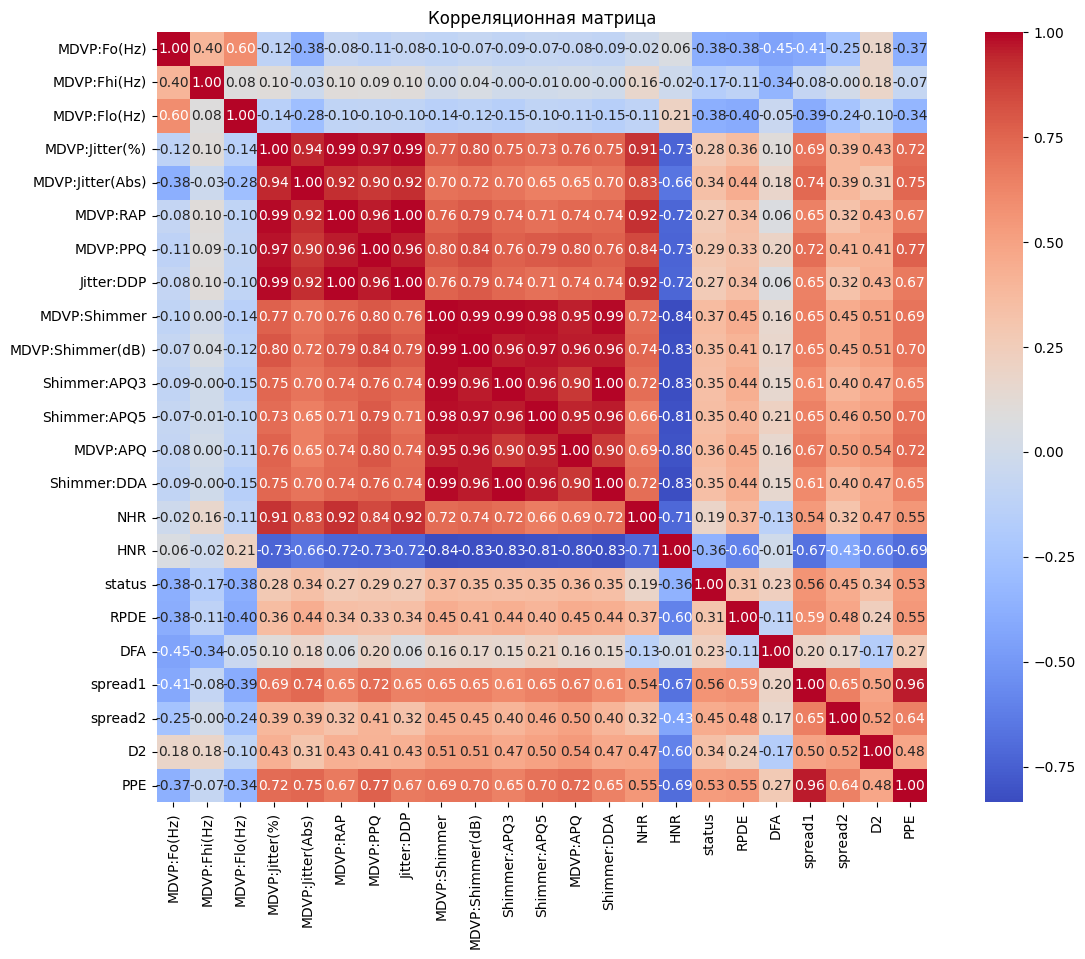

In [20]:
correlation_matrix = processed_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

In [21]:
num_features = processed_df.select_dtypes(np.number).drop(columns=['status']).columns
num_features

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

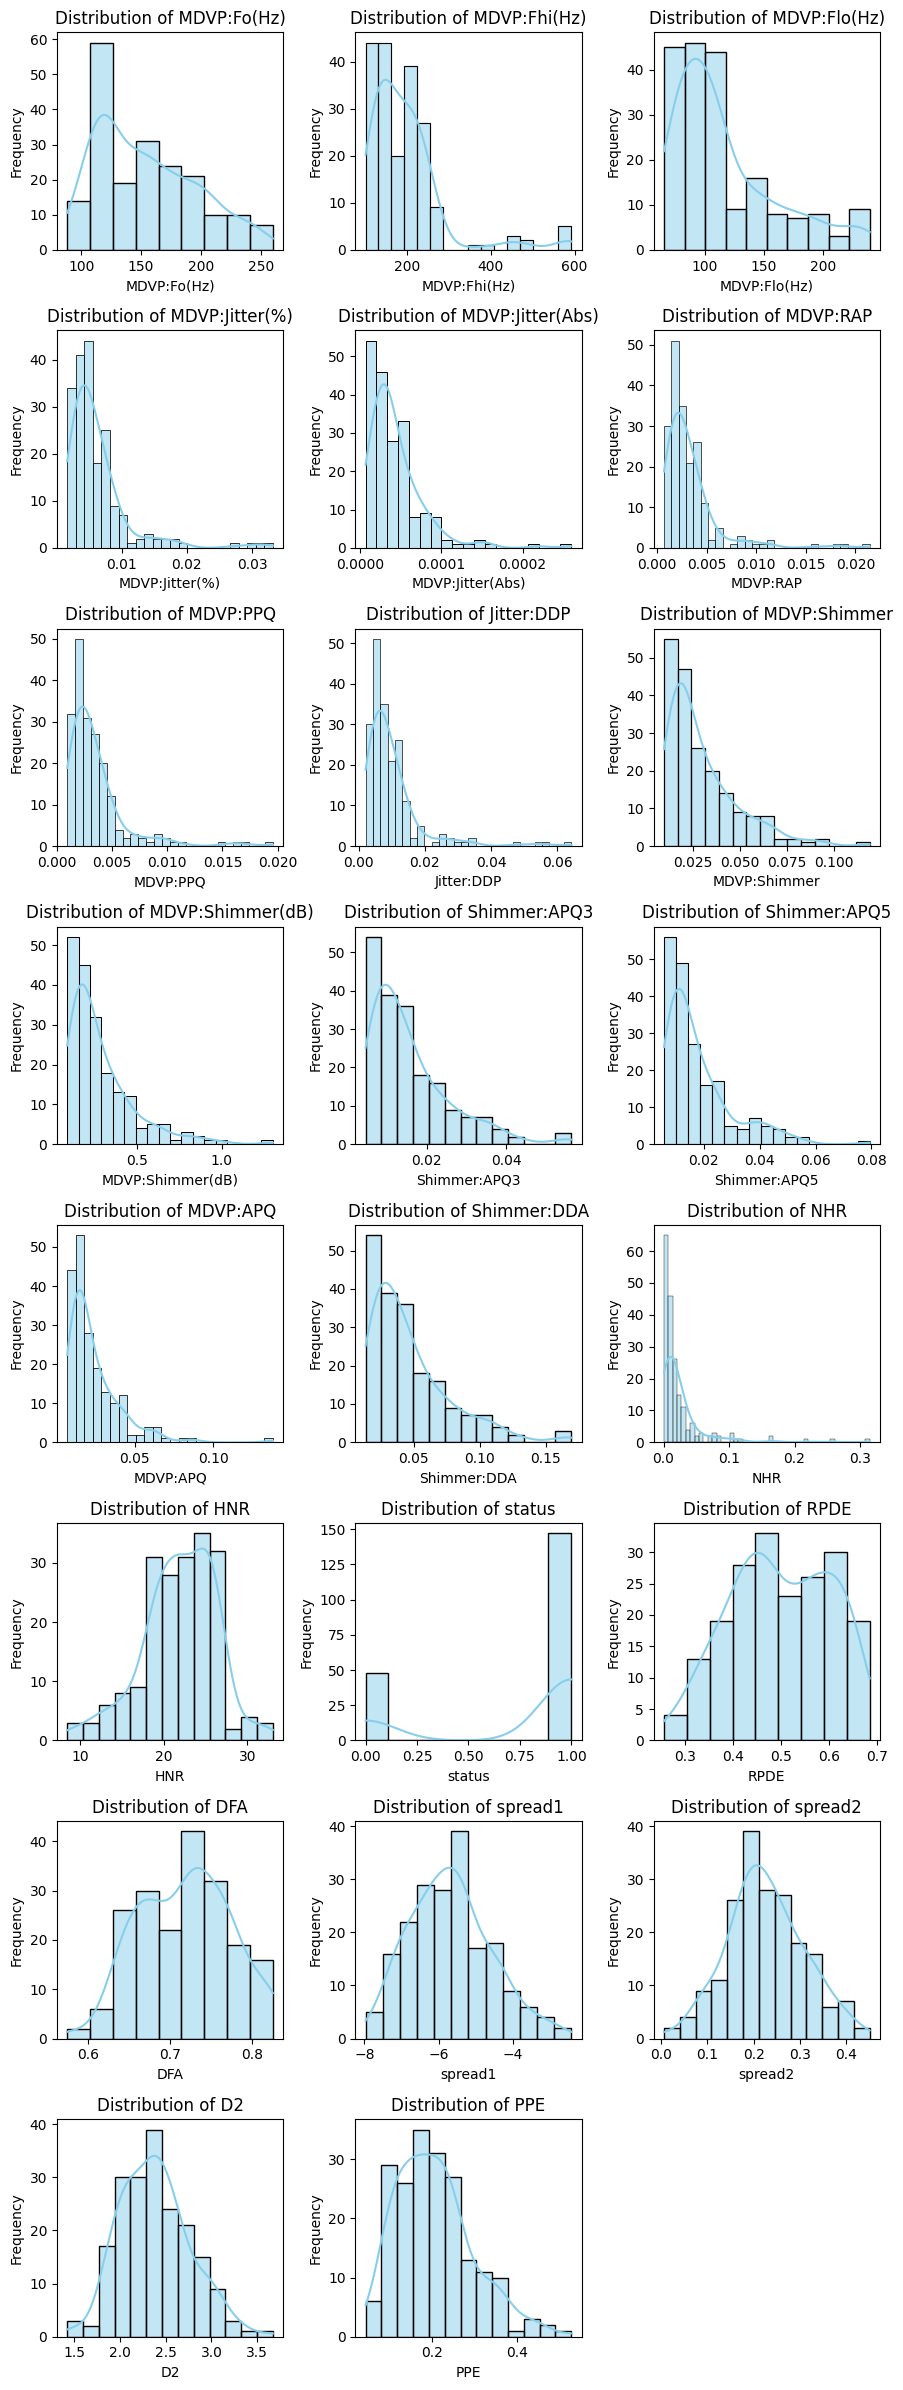

In [22]:
num_cols = len(processed_df.columns)
num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(num_rows, min(num_cols, 3) , figsize=(9, 3 * num_rows))

axes = axes.flatten()

for i, col in enumerate(processed_df.columns):
    sns.histplot(processed_df[col], kde=True, ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [23]:
outliers_PPE = 0.4
data_PPE = processed_df[data['PPE'] < outliers_PPE]

outliers_spread1 = -3
data_spread1 = data_PPE[data_PPE['spread1'] < outliers_spread1]

outliers_NHR = 0.05
data_HNR = data_PPE[data_PPE['NHR'] < outliers_NHR]

outliers_Shimmer_DDA = 0.11
data_Shimmer_DDA = data_HNR[data_HNR['Shimmer:DDA'] < outliers_Shimmer_DDA]

outliers_Shimmer_APQ5 = 0.04
data_Shimmer_APQ5 = data_Shimmer_DDA[data_Shimmer_DDA['Shimmer:APQ5'] < outliers_Shimmer_APQ5]

outliers_Shimmer_APQ3 = 0.035
data_Shimmer_APQ3 = data_Shimmer_APQ5[data_Shimmer_APQ5['Shimmer:APQ3'] < outliers_Shimmer_APQ3]

outliers_MDVP_Shimmer_dB = 0.06
data_MDVP_Shimmer_dB = data_Shimmer_APQ3[data_Shimmer_APQ3['MDVP:Shimmer(dB)'] > outliers_MDVP_Shimmer_dB]

outliers_MDVP_Shimmer = 0.063
data_MDVP_Shimmer = data_MDVP_Shimmer_dB[data_MDVP_Shimmer_dB['MDVP:Shimmer'] < outliers_MDVP_Shimmer]

outliers_Jitter_DDP = 0.02
data_Jitter_DDP = data_MDVP_Shimmer[data_MDVP_Shimmer['Jitter:DDP'] < outliers_Jitter_DDP]

outliers_MDVP_PPQ = 0.0072
data_MDVP_PPQ = data_Jitter_DDP[data_Jitter_DDP['MDVP:PPQ'] < outliers_MDVP_PPQ]

outliers_MDVP_RAP = 0.007
data_MDVP_RAP = data_MDVP_PPQ[data_MDVP_PPQ['MDVP:RAP'] < outliers_MDVP_RAP]

outliers_MDVP_Jitter_Abs = 0.00012
data_MDVP_Jitter_Abs = data_MDVP_RAP[data_MDVP_RAP['MDVP:Jitter(Abs)'] < outliers_MDVP_Jitter_Abs]

outliers_MDVP_Jitter_Abs = 0.00012
data_MDVP_Jitter_Abs = data_MDVP_RAP[data_MDVP_RAP['MDVP:Jitter(%)'] > outliers_MDVP_Jitter_Abs]

outliers_MDVP_Flo_Hz  = 225
data_MDVP_Flo_Hz = data_MDVP_Jitter_Abs[data_MDVP_Jitter_Abs['MDVP:Flo(Hz)'] < outliers_MDVP_Flo_Hz]


outliers_MDVP_Fhi_Hz  = 350
data_MDVP_Fhi_Hz = data_MDVP_Flo_Hz[data_MDVP_Flo_Hz['MDVP:Fhi(Hz)'] < outliers_MDVP_Fhi_Hz]
print('Датасет после очистки:',len(data_MDVP_Fhi_Hz))

Датасет после очистки: 150


In [24]:
processed_df = data_MDVP_Fhi_Hz

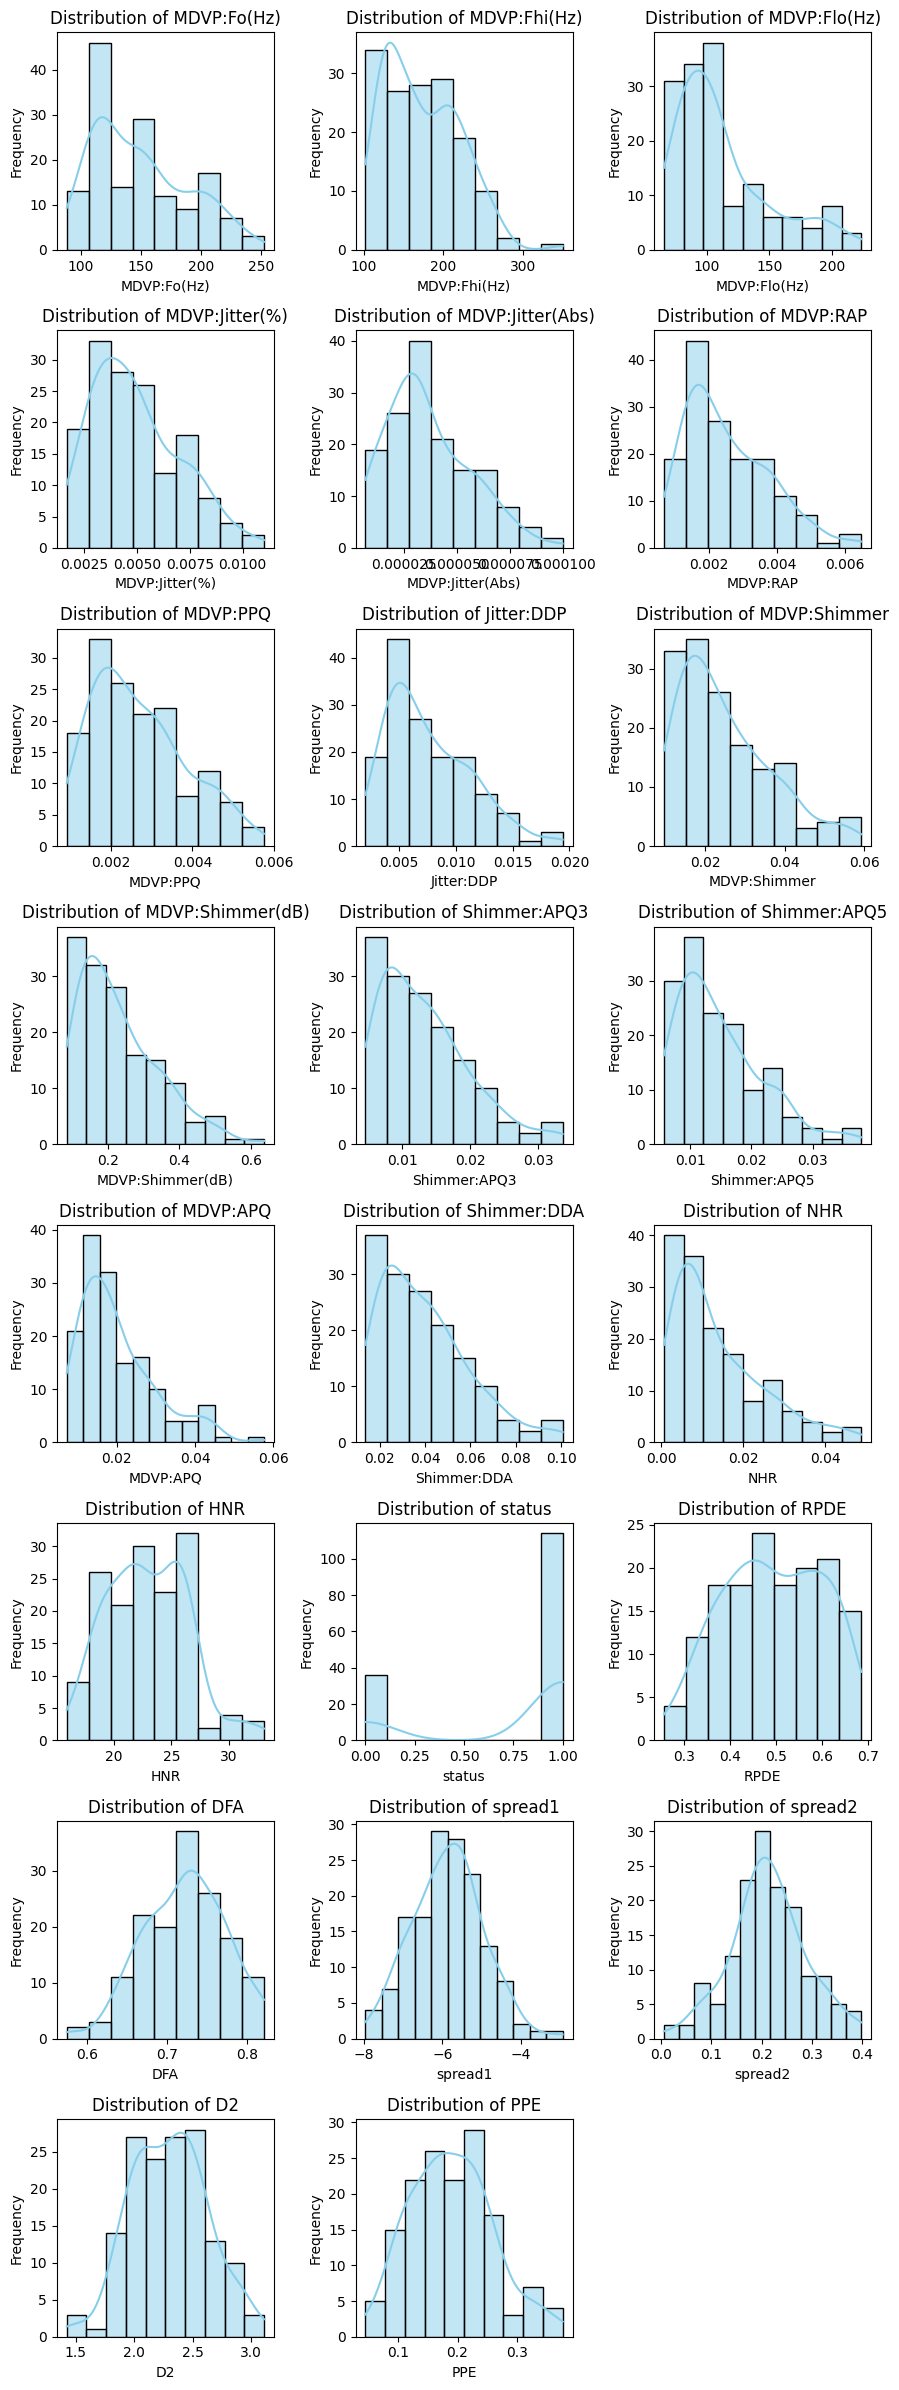

In [25]:
num_cols = len(processed_df.columns)
num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(num_rows, min(num_cols, 3) , figsize=(9, 3 * num_rows))

axes = axes.flatten()

for i, col in enumerate(processed_df.columns):
    sns.histplot(processed_df[col], kde=True, ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [26]:
from sklearn.discriminant_analysis import StandardScaler


num_transformer = Pipeline([
    ('scaler', StandardScaler())
])

In [27]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('num', num_transformer, list(num_features))
    ]
)

In [28]:
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ('ct', ct),
    ('model',  LogisticRegression(random_state=0, solver='liblinear', n_jobs=-1, max_iter=2000)),
])

In [52]:
from sklearn.model_selection import train_test_split


X = processed_df.drop('status', axis=1)  
y = processed_df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42) 


In [53]:
print("Размер тренировочного набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер тренировочного набора: (120, 22)
Размер тестового набора: (30, 22)


In [54]:
pipeline.fit(X_train, y_train)

c:\Users\Лиана\OneDrive\Desktop\ITMO\ML-ITMO\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MDVP:Fo(Hz)',
                                                   'MDVP:Fhi(Hz)',
                                                   'MDVP:Flo(Hz)',
                                                   'MDVP:Jitter(%)',
                                                   'MDVP:Jitter(Abs)',
                                                   'MDVP:RAP', 'MDVP:PPQ',
                                                   'Jitter:DDP', 'MDVP:Shimmer',
                                                   'MDVP:Shimmer(dB)',
                                                   'Shimmer:APQ3',
                                                   'Shimmer:APQ5', 'MDVP:APQ',
                                                   'Shimmer:DDA', 'NHR', 'HNR',
                                                   'RPDE', 'DFA', 'spread1',
                                                   'spread2', 'D2', 'PPE'])])),
                ('model',
                 LogisticRegression(max_iter=2000, n_jobs=-1, random_state=0,
                                    solver='liblinear'))])

In [55]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pipeline.predict(X_test))
print("Точность на валидационном наборе:", accuracy)

Точность на валидационном наборе: 0.8333333333333334


In [13]:
!pip install optuna

In [33]:
from functools import partial
import optuna

c:\Users\Лиана\OneDrive\Desktop\ITMO\ML-ITMO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler

scalers = {
    'StandartScaler': StandardScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

In [58]:
def objective(trial: optuna.trial.Trial):
    scaler_type = trial.suggest_categorical('numeric_scaler', list(scalers.keys()))

    num_transformer = Pipeline([
    ('scaler', scalers[scaler_type])
     ])

    ct = ColumnTransformer(
    transformers=[
      ('num', num_transformer, list(num_features)),
    ]
  )

    solver =  trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear'])
    C = trial.suggest_float('C', 1e-4, 10)
    max_iter = trial.suggest_int('max_iter', 50, 10000, log=True)

    pipeline = Pipeline([
    ('ct', ct),
    ('model', LogisticRegression(solver=solver, penalty='l2', C=C, max_iter=max_iter, random_state=42, n_jobs=-1))
  ])
    pipeline.fit(X_train, y_train)

    accuracy = accuracy_score(y_test, pipeline.predict(X_test))

    return accuracy

In [60]:
study = optuna.create_study(direction='maximize')
obj_func = partial(objective)
study.optimize(obj_func, n_trials=1000, gc_after_trial=True)

print("Лучшие параметры:", study.best_params)
print("Лучшая оценка:", study.best_value)

[I 2025-03-03 22:34:35,139] A new study created in memory with name: no-name-cff47ab3-04d6-4212-8640-4afe26c35195
c:\Users\Лиана\OneDrive\Desktop\ITMO\ML-ITMO\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
[I 2025-03-03 22:34:35,155] Trial 0 finished with value: 0.8 and parameters: {'numeric_scaler': 'MinMaxScaler', 'solver': 'liblinear', 'C': 2.025230606180271, 'max_iter': 2573}. Best is trial 0 with value: 0.8.
[I 2025-03-03 22:34:35,310] Trial 1 finished with value: 0.8666666666666667 and parameters: {'numeric_scaler': 'StandartScaler', 'solver': 'lbfgs', 'C': 6.289424787836278, 'max_iter': 62}. Best is trial 1 with value: 0.8666666666666667.
[I 2025-03-03 22:34:35,472] Trial 2 finished with value: 0.8 and parameters: {'numeric_scaler': 'MinMaxScaler', 'solver': 'lbfgs', 'C': 2.711185212904023, 'max_iter': 3154}. Best is trial 1 with value: 0.8

Лучшие параметры: {'numeric_scaler': 'StandartScaler', 'solver': 'lbfgs', 'C': 6.289424787836278, 'max_iter': 62}
Лучшая оценка: 0.8666666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier


def objective(trial):
    scaler_type = trial.suggest_categorical('numeric_scaler', list(scalers.keys()))

    num_transformer = Pipeline([
    ('scaler', scalers[scaler_type])
     ])

    ct = ColumnTransformer(
    transformers=[
      ('num', num_transformer, list(num_features)),
    ]
  )

    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 32)  # Диапазон для max_depth
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None]) 

    pipeline = Pipeline([
    ('ct', ct),
    ('model', DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42 
    ))
  ]) 
    
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy 

In [57]:
study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=1000)
print("Лучшие параметры:", study.best_params)
print("Лучшая оценка:", study.best_value)

[I 2025-03-03 22:32:36,771] A new study created in memory with name: no-name-cfe01c9b-7a90-4a77-a680-d6f0880224c5
[I 2025-03-03 22:32:36,799] Trial 0 finished with value: 0.8 and parameters: {'numeric_scaler': 'MaxAbsScaler', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 46, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8.
[I 2025-03-03 22:32:36,811] Trial 1 finished with value: 0.8333333333333334 and parameters: {'numeric_scaler': 'StandartScaler', 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 48, 'min_samples_leaf': 23, 'max_features': 'log2'}. Best is trial 1 with value: 0.8333333333333334.
[I 2025-03-03 22:32:36,816] Trial 2 finished with value: 0.7 and parameters: {'numeric_scaler': 'StandartScaler', 'criterion': 'gini', 'max_depth': 32, 'min_samples_split': 69, 'min_samples_leaf': 79, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8333333333333334.
[I 2025-03-03 22:32:36,839] Trial 3 finished with value: 0.7

Лучшие параметры: {'numeric_scaler': 'MinMaxScaler', 'criterion': 'gini', 'max_depth': 23, 'min_samples_split': 44, 'min_samples_leaf': 17, 'max_features': 'log2'}
Лучшая оценка: 0.9666666666666667


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score


def objective(trial):
    scaler_type = trial.suggest_categorical('numeric_scaler', list(scalers.keys()))

    num_transformer = Pipeline([
        ('scaler', scalers[scaler_type])
    ])

    ct = ColumnTransformer(
        transformers=[
            ('num', num_transformer, list(num_features)),
        ]
    )

    n_estimators = trial.suggest_int('n_estimators', 50, 200) # Количество деревьев
    max_depth = trial.suggest_int('max_depth', 2, 32)  
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy']) #Можно добавить, хотя и не всегда критично
    bootstrap = trial.suggest_categorical('bootstrap', [True, False]) # Добавим бутстрап


    pipeline = Pipeline([
        ('ct', ct),
        ('model', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            criterion=criterion,
            bootstrap=bootstrap,
            random_state=42
        ))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [62]:
study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=1000)
print("Лучшие параметры:", study.best_params)
print("Лучшая оценка:", study.best_value)

[I 2025-03-03 22:37:22,141] A new study created in memory with name: no-name-949c099e-c3a3-48d8-bd61-c7dc001f6134


[I 2025-03-03 22:37:22,292] Trial 0 finished with value: 0.7 and parameters: {'numeric_scaler': 'MinMaxScaler', 'n_estimators': 65, 'max_depth': 27, 'min_samples_split': 74, 'min_samples_leaf': 41, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': True}. Best is trial 0 with value: 0.7.
[I 2025-03-03 22:37:22,556] Trial 1 finished with value: 0.7 and parameters: {'numeric_scaler': 'MaxAbsScaler', 'n_estimators': 189, 'max_depth': 31, 'min_samples_split': 76, 'min_samples_leaf': 59, 'max_features': None, 'criterion': 'entropy', 'bootstrap': True}. Best is trial 0 with value: 0.7.
[I 2025-03-03 22:37:22,717] Trial 2 finished with value: 0.7 and parameters: {'numeric_scaler': 'MaxAbsScaler', 'n_estimators': 153, 'max_depth': 4, 'min_samples_split': 98, 'min_samples_leaf': 84, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 0 with value: 0.7.
[I 2025-03-03 22:37:22,839] Trial 3 finished with value: 0.7 and parameters: {'numeric_scaler': 'MinMax

Лучшие параметры: {'numeric_scaler': 'MinMaxScaler', 'n_estimators': 143, 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': None, 'criterion': 'gini', 'bootstrap': True}
Лучшая оценка: 0.9
